In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv('/Users/Adam/Downloads/house-votes-84.data',header=None)

In [3]:
def yn(s): #yes i know this is sloppy
    if s=='y': return 1
    if s=='n': return 0
    if s=='republican': return 'R'
    if s=='democrat': return 'D'
data=data.applymap(yn)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,R,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,R,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,D,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,D,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,D,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [4]:
for s in range(1,len(data.columns.tolist())):
    m=data[s].sum()/data[s].count()
    data[s].fillna(value=m,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,R,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,R,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,D,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,D,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,D,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


**Challenge 2**

In [5]:
from sklearn.cross_validation import train_test_split

/Users/Adam/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=0.7)

**Challenge 3**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#def av(a):
#    return float(sum(a))/len(a)

In [8]:
knn_acc = []
s=20
for i in range(1,s):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    knn_acc.append(accuracy_score(ytest,ypred))
knn_acc

[0.90491803278688521,
 0.90491803278688521,
 0.91475409836065569,
 0.91475409836065569,
 0.91475409836065569,
 0.91803278688524592,
 0.92131147540983604,
 0.91475409836065569,
 0.91147540983606556,
 0.90491803278688521,
 0.90163934426229508,
 0.8918032786885246,
 0.89508196721311473,
 0.8918032786885246,
 0.8918032786885246,
 0.88524590163934425,
 0.8918032786885246,
 0.88524590163934425,
 0.87868852459016389]

k=3 seems best

**Challenge 4**

In [9]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [10]:
lscore=accuracy_score(ypred,ytest)

**Challenge 5**

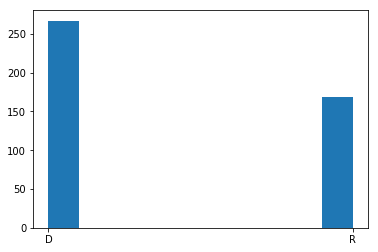

In [11]:
plt.hist(data[0]);

In [12]:
def dem(x):
    return pd.Series(len(x)*['D'])
def rep(x):
    return pd.Series(len(x)*['R'])

In [13]:
rscore=accuracy_score(rep(ytest),ytest.reset_index(drop=True))
dscore=accuracy_score(dem(ytest),ytest.reset_index(drop=True))

**Challenge 6**

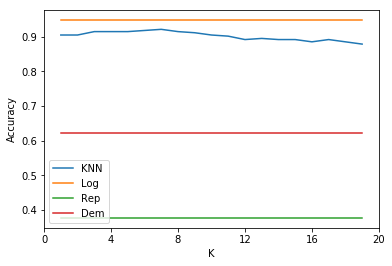

In [14]:
plt.plot(range(1,s),knn_acc)
plt.plot(range(1,s),(s-1)*[lscore])
plt.plot(range(1,s),(s-1)*[rscore])
plt.plot(range(1,s),(s-1)*[dscore])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(0,21,4))
plt.legend(['KNN','Log','Rep','Dem']);

**Challenge 7**

In [15]:
from sklearn.learning_curve import learning_curve
# learning_curve() I didn't get how this one works...

/Users/Adam/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


**Challenge 8**

In [16]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
lscore=accuracy_score(ypred,ytest)
lscore

0.93114754098360653

In [17]:
from sklearn.svm import SVC

model=SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
lscore=accuracy_score(ypred,ytest)
lscore

0.94426229508196724

In [18]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
lscore=accuracy_score(ypred,ytest)
lscore

0.93770491803278688

In [19]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
lscore=accuracy_score(ypred,ytest)
lscore

0.93442622950819676

**Challenge 9**

In [20]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [21]:
from sklearn.cross_validation import cross_val_score

def avnp(l):
    l=list(l)
    return sum(l)/len(l)

In [22]:
model=GaussianNB()
avnp(cross_val_score(model,X,y=Y))

0.93103448275862066

In [23]:
model=SVC()
avnp(cross_val_score(model,X,y=Y))

0.95402298850574718

In [24]:
model=DecisionTreeClassifier()
avnp(cross_val_score(model,X,y=Y))

0.9517241379310345

In [25]:
model=RandomForestClassifier()
avnp(cross_val_score(model,X,y=Y))

0.95402298850574707

**Challenge 10**

In [26]:
data=pd.read_csv('/Users/Adam/Downloads/house-votes-84.data',header=None)
def yn(s): #yes i know this is sloppy
    if s=='y': return 1
    if s=='n': return 0
    if s=='republican': return 'R'
    if s=='democrat': return 'D'
data=data.applymap(yn)
#data.drop([0],axis=1,inplace=True)


In [27]:
for i in data.columns.tolist():
    data[i].fillna(data[i].mode()[0],inplace=True)


In [28]:
X=data.iloc[:,2:]
Y=data.iloc[:,1]

In [29]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
avnp(cross_val_score(model,X,y=Y))

0.67561451389982319

**Challenge 11**

In [30]:
mdata = pd.read_csv('data/2013_movies.csv').dropna()
mdata.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


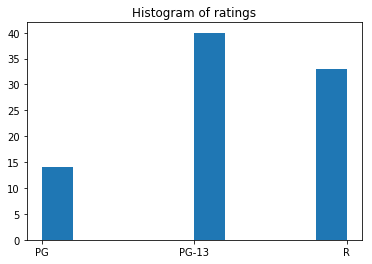

In [31]:
plt.hist(mdata.Rating)
plt.title('Histogram of ratings');

In [32]:
mdata['ReleaseMonth']=mdata['ReleaseDate'].str.slice(5,7).astype(int)
X=mdata.drop(['Rating','Title','ReleaseDate','Director'],axis=1)
Y=mdata.Rating

In [33]:
model=KNeighborsClassifier(n_neighbors=4) #even does better than odd. probably a tiebreak thing.
avnp(cross_val_score(model,X,y=Y))

0.41417624521072799

In [34]:
model=LogisticRegression()
avnp(cross_val_score(model,X,y=Y))


0.55060207991242471

In [35]:
avnp((pd.Series(len(Y)*[Y.mode()[0]]) == Y.reset_index(drop=True)).astype(float)) #dumb model accuracy

0.45977011494252873

Not as good as Logit but better than KNN

In [36]:
zip(list(X.columns),list(model.fit(X,Y).coef_[0]))

[('Budget', -6.9855891551771955e-09),
 ('DomesticTotalGross', -5.018217448018553e-09),
 ('Runtime', -1.6174312333959568e-13),
 ('ReleaseMonth', -8.9179579168737567e-15)]

**Challenge 12**

In [37]:
hdata=pd.read_csv('/Users/Adam/Downloads/haberman.data',header=None)
hdata.columns=['age','year','nodes','survival']
hdata.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [38]:
hdata.age.mean(),hdata.age.std()

(52.45751633986928, 10.80345234930328)

In [39]:
a=hdata.age[hdata.survival==1]
a.mean(),a.std()

(52.01777777777778, 11.012154179929546)

In [40]:
b=hdata.age[hdata.survival==2]
b.mean(),b.std()

(53.67901234567901, 10.16713720829741)

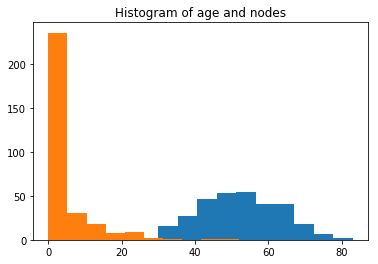

In [41]:
plt.hist(hdata.age)
plt.hist(hdata.nodes)
plt.title('Histogram of age and nodes');

In [42]:
hdata.year.min(),hdata.year.max()

(58, 69)

In [43]:
X=hdata[['age','year','nodes']]
Y=hdata.survival
model=LogisticRegression()
avnp(cross_val_score(model,X,y=Y))

0.75163398692810457

In [44]:
zip(list(X.columns),list(model.fit(X,Y).coef_[0]))

[('age', 0.018546889125731318),
 ('year', -0.034545797986990284),
 ('nodes', 0.088123140474501274)]

More nodes indicates low survival. Higher age slightly indicates low survival. More recent years indicate better survival, probably because of better medicine and tech.